In [2]:
from units.base import vis_img
import numpy as np

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
DEBUG=False
def vis_slice(img:np.ndarray, title="", axis=0,start=0,skip=0,r=8,c=8,end=-1,upside=False, save_path=None):
    # plt.title(title)
    
    plt.figure(figsize=(4*c,4*r))
    # fig, ax=plt.subplots(r,c,squeeze=False)
    # print(ax.shape)
    cp=cm.get_cmap('gray')
    if end==-1 or end>img.shape[axis]:end=img.shape[axis]
    for si in range(r*c):
        i,j=si//c,si%c
        pos=start+si*(skip+1)
        if pos>img.shape[axis]: break
        if upside:pos=-1-pos
        if pos>=end:break
        if axis==0:
            img_si=img[pos, :, :]
        elif axis==1:
            img_si=img[:, pos, :]
        else:
            img_si=img[:, :, pos]

        img_si=np.rot90(img_si)
        plt.subplot(r,c,si+1)
        plt.imshow(img_si,vmin=0,vmax=1,cmap=cp)
        plt.axis('off')

    # plt.subplot(r+1, c, si+1)
    # plt.colorbar(location='bottom',extend="max")
    plt.figure(figsize=(4*c,4))
    norm1 = mpl.colors.Normalize(vmin=0, vmax=1)
    im1 = cm.ScalarMappable(norm=norm1, cmap=cp)
    # plt.subplot(r+1, 1, r+1)
    plt.colorbar(im1,orientation='horizontal',
    extend='max',ticks=np.linspace(0.0, 1.0, num=10))
    plt.show()
        
    if save_path is not None:
        plt.savefig(save_path, dpi=100)
    if DEBUG:
        plt.show()
    plt.close()

In [13]:
import nibabel as nib
TP=r"C:\Users\CH2\Documents\datasets\brainmap\try\t1\MNI152_T1_0.8mm_brain.nii.gz"
out_path=r"C:\Users\CH2\Projects\AD_GAN\analysis"
nimg=nib.load(f"{TP}")
img=nimg.get_fdata()
afi,hed=nimg.affine.copy(),nimg.header.copy()
# img=nimg.get_fdata()#[17:-18,26:-22,5:-30]

p,q,r=np.array(img.shape)//2
k=64
t1=img[p-k:p+k,q-k:q+k,r-k:r+k]
afi,hed=nimg.affine.copy(),nimg.header.copy()
ori_nii=nib.Nifti1Image(t1,afi,hed)
nib.save(ori_nii,rf"{out_path}/template.nii.gz")


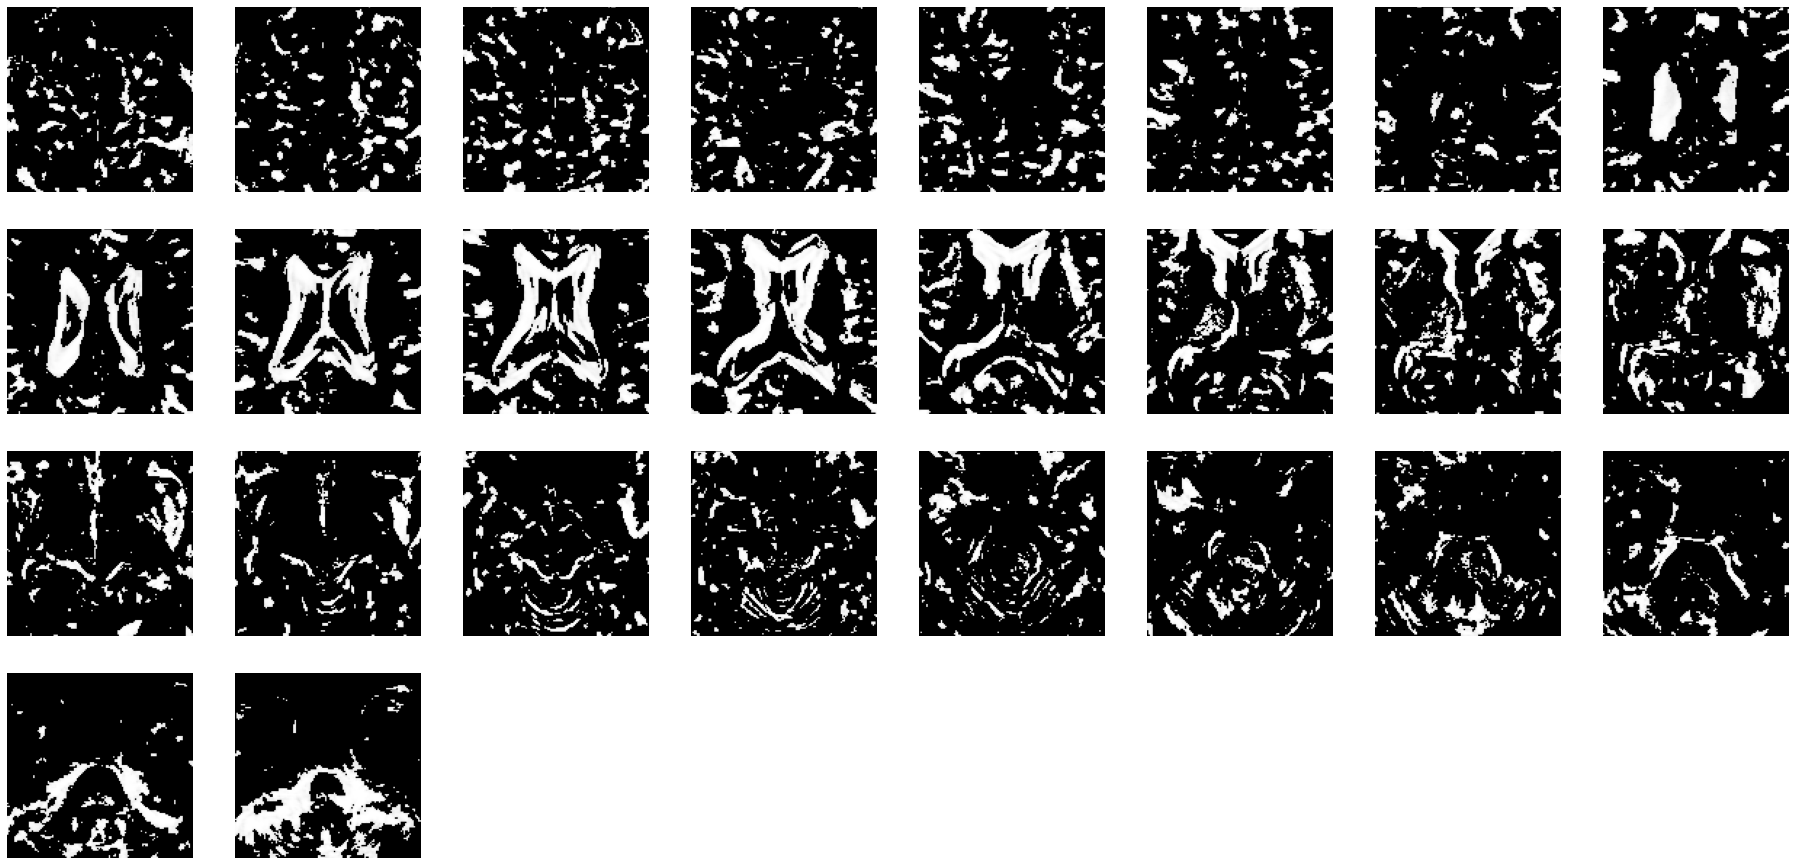

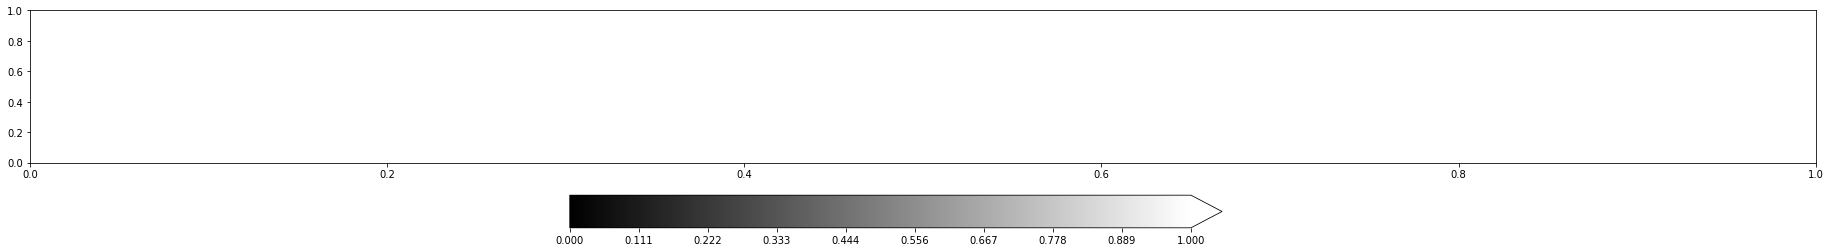

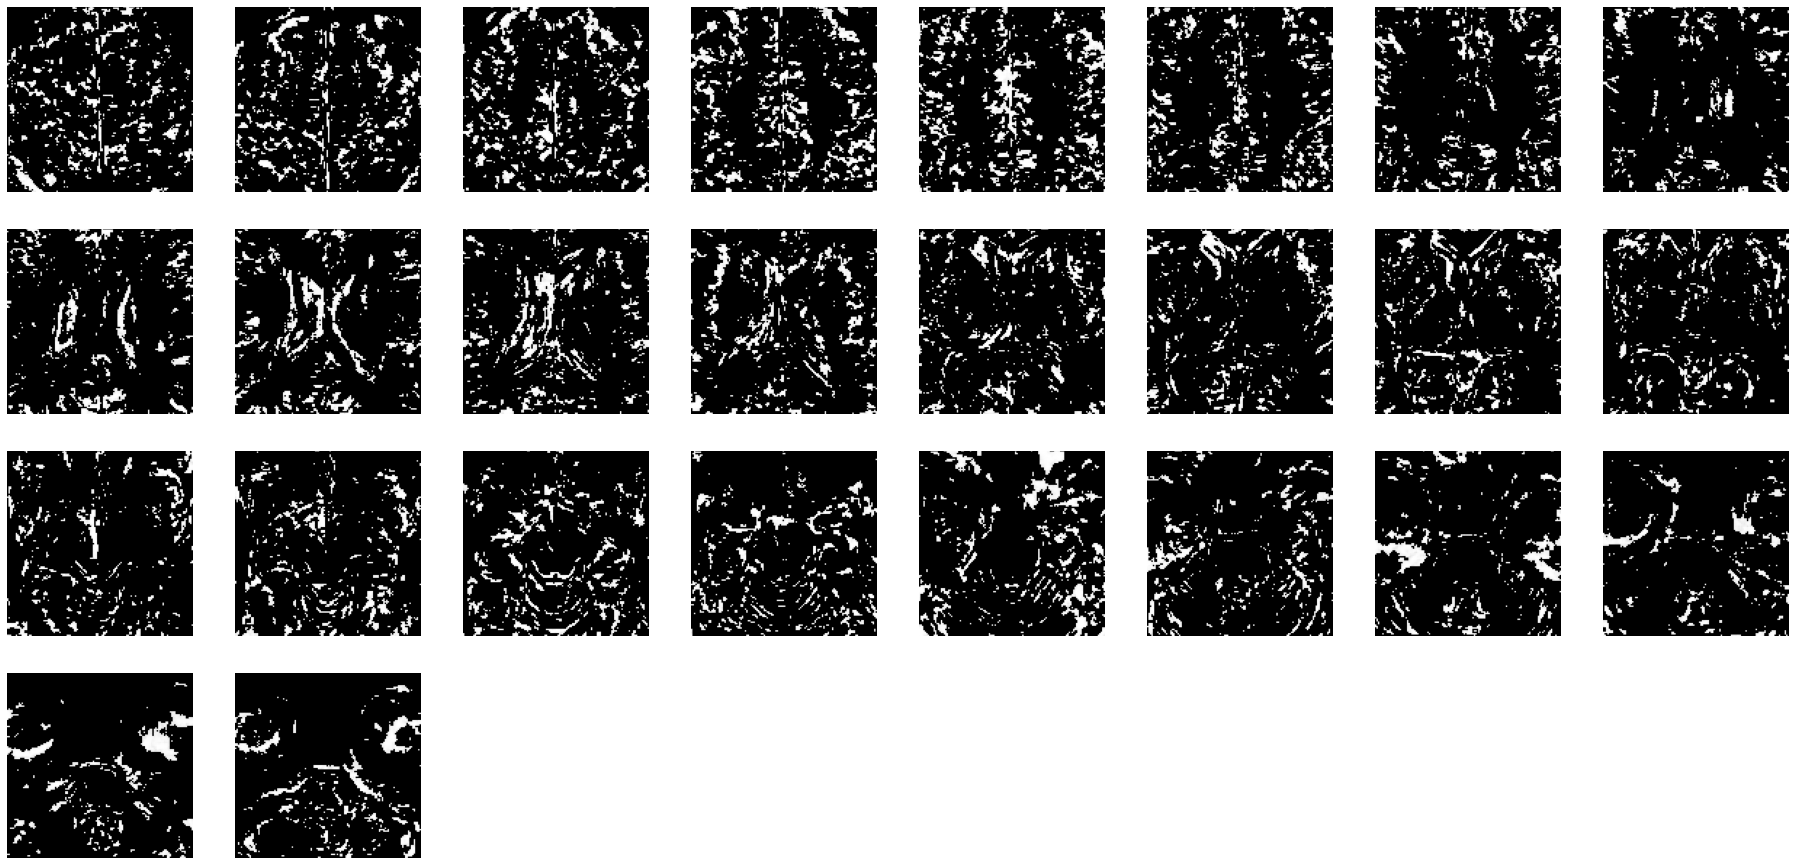

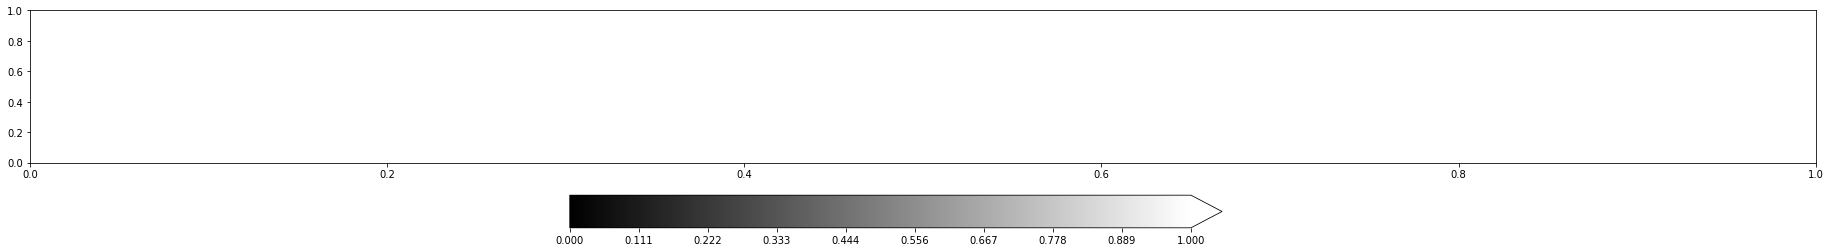

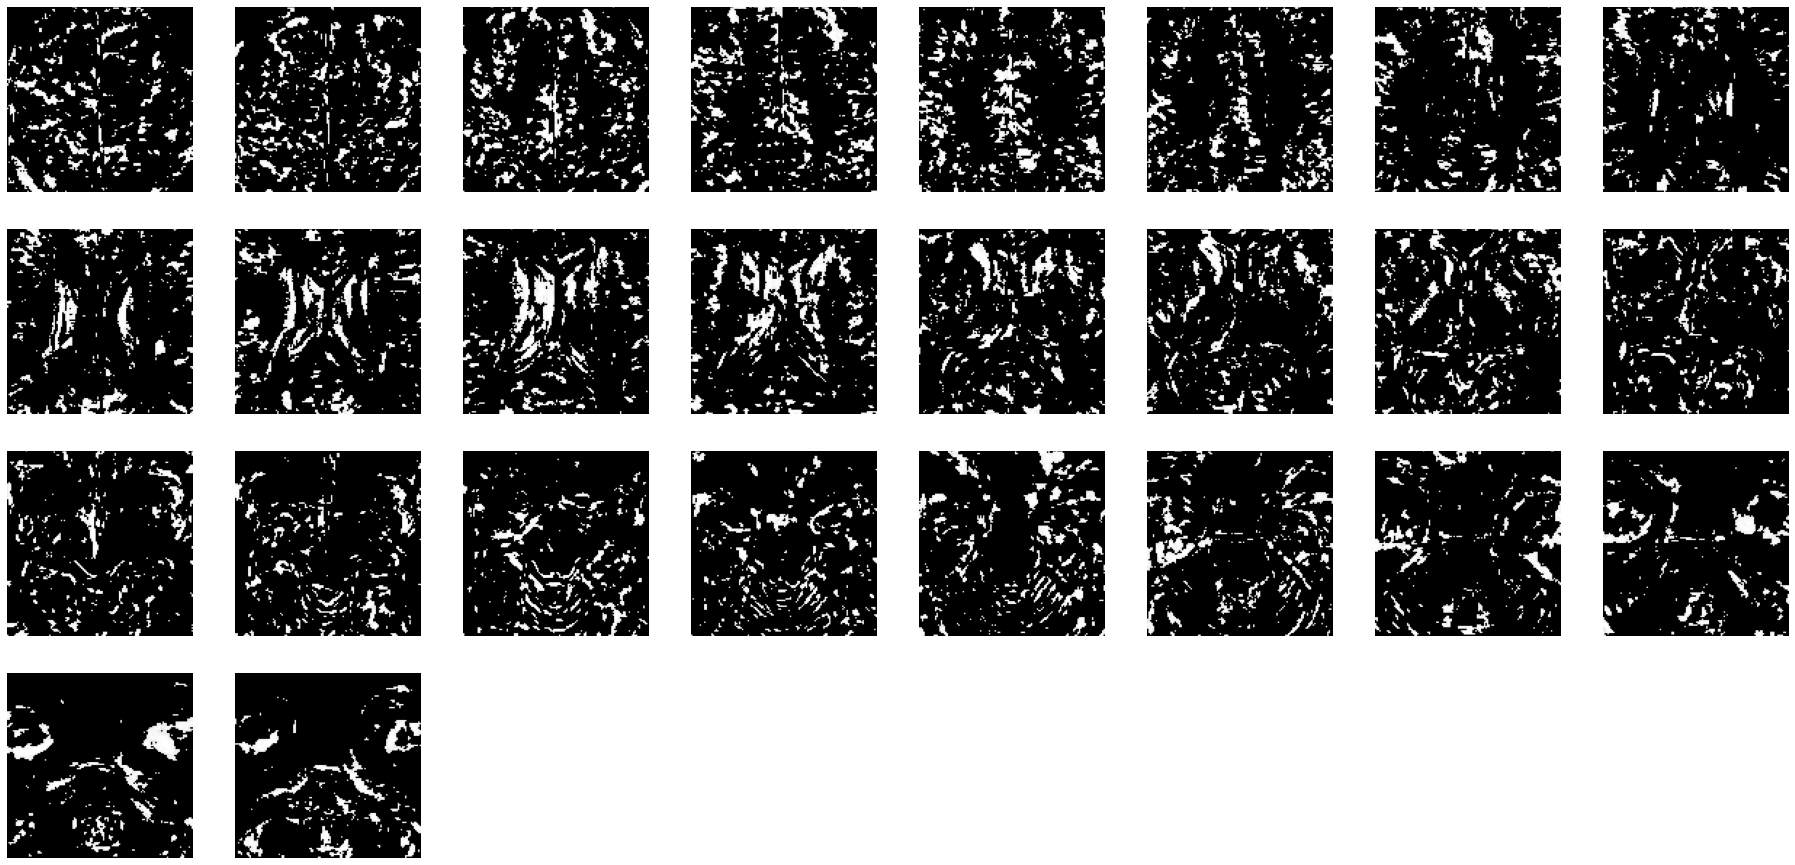

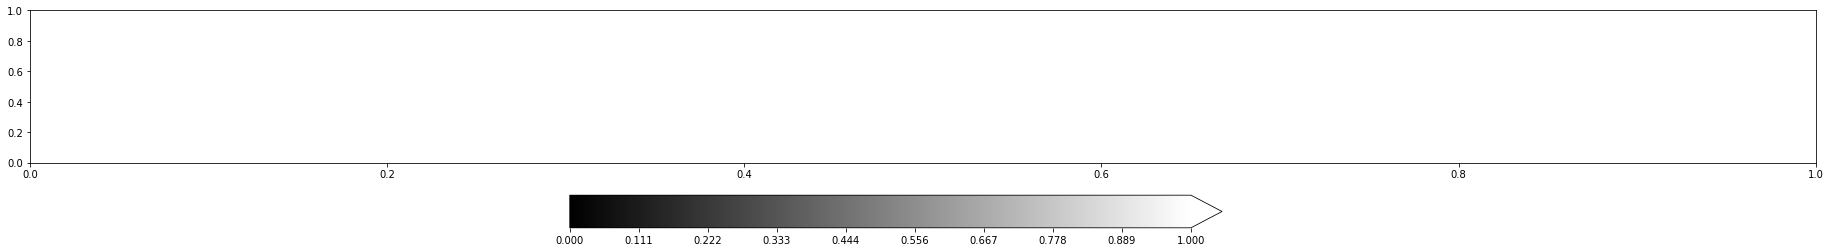

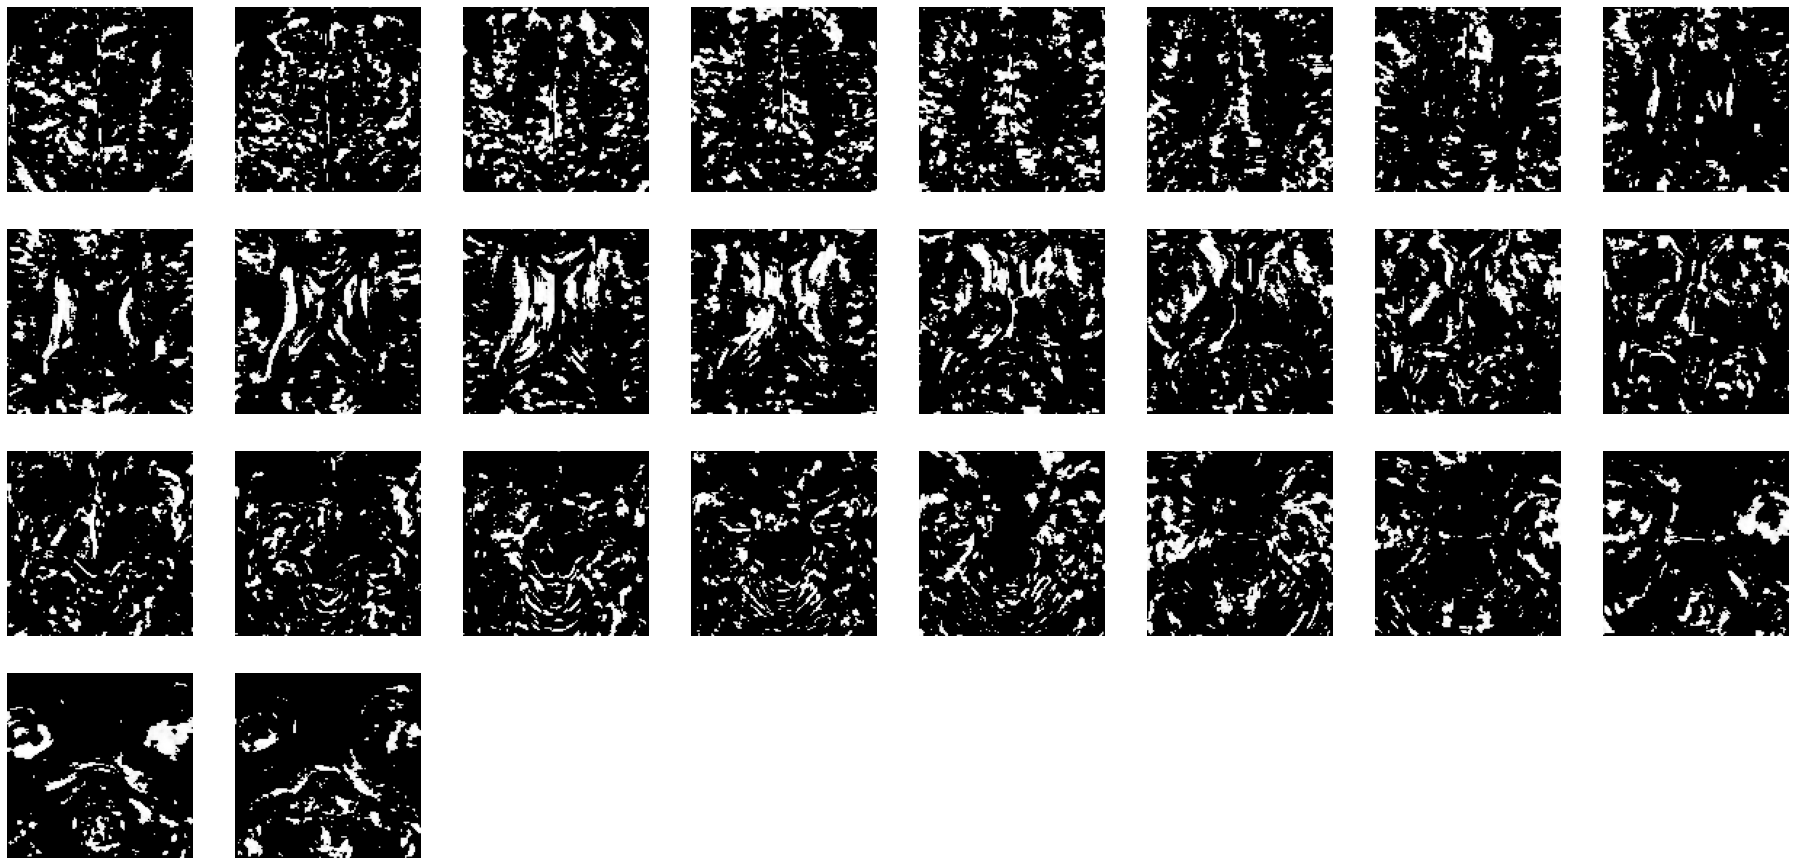

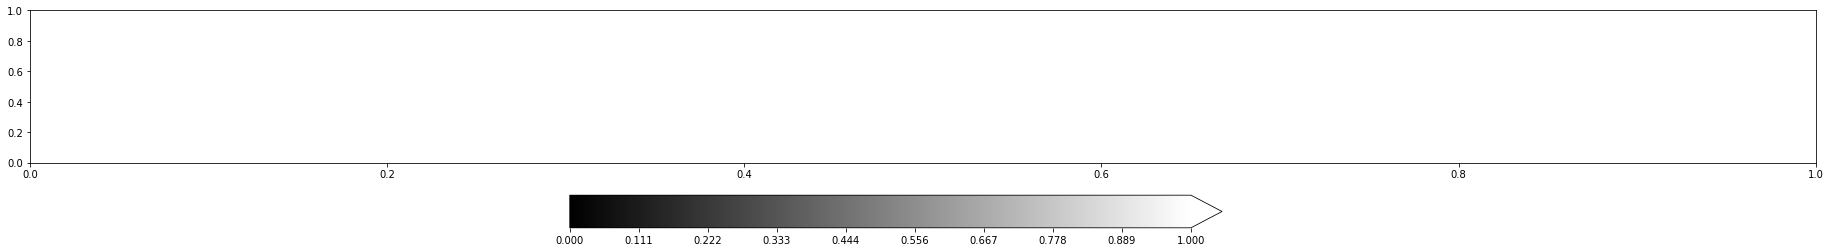

In [21]:
PATH=r"C:\Users\CH2\Documents\datasets\ZS_t1_full\TT\\"
pth=0.1
flist=["T1_p","delta1_p","delta2_p","delta3_p"]
for fi in flist:
    p=np.load(PATH+f"{fi}.npy")
    p[np.isnan(p)]=1
    p[p>pth]=1
    pme=1-p

    vis_slice(pme,axis=2,start=0,skip=4,upside=True)
    p_nii=nib.Nifti1Image(pme,afi,hed)
    nib.save(p_nii,rf"{out_path}/{fi}_{pth}.nii.gz")

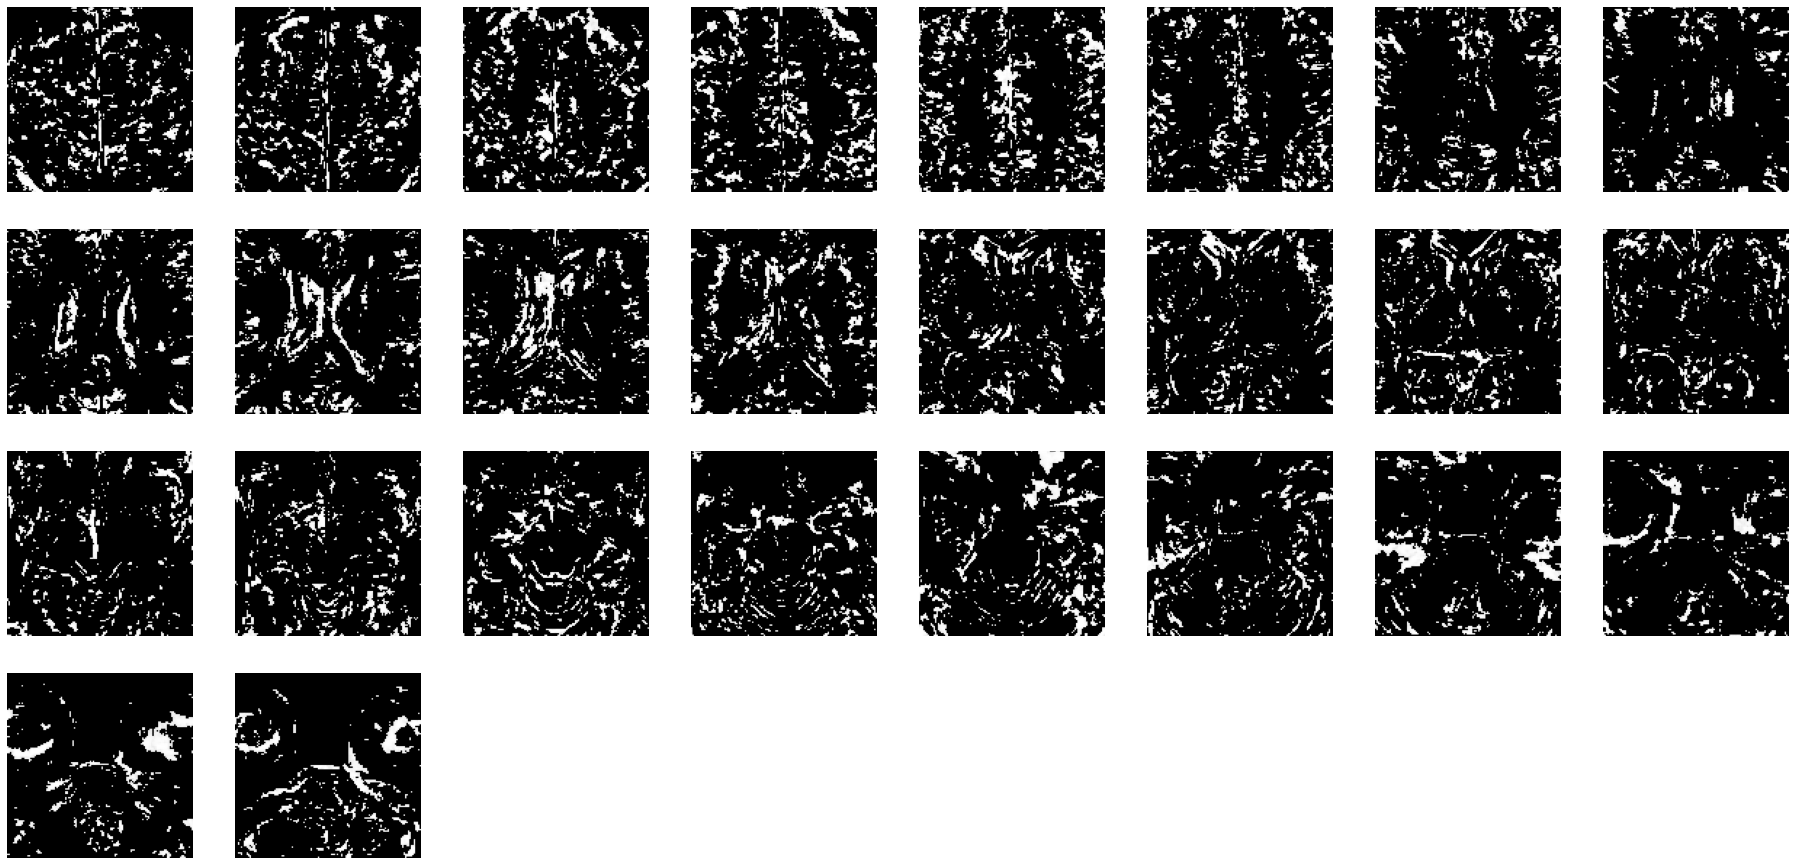

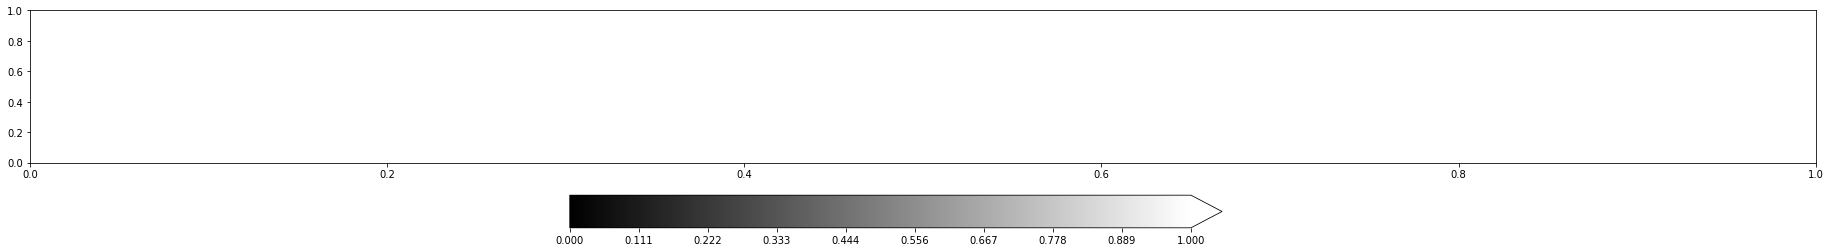

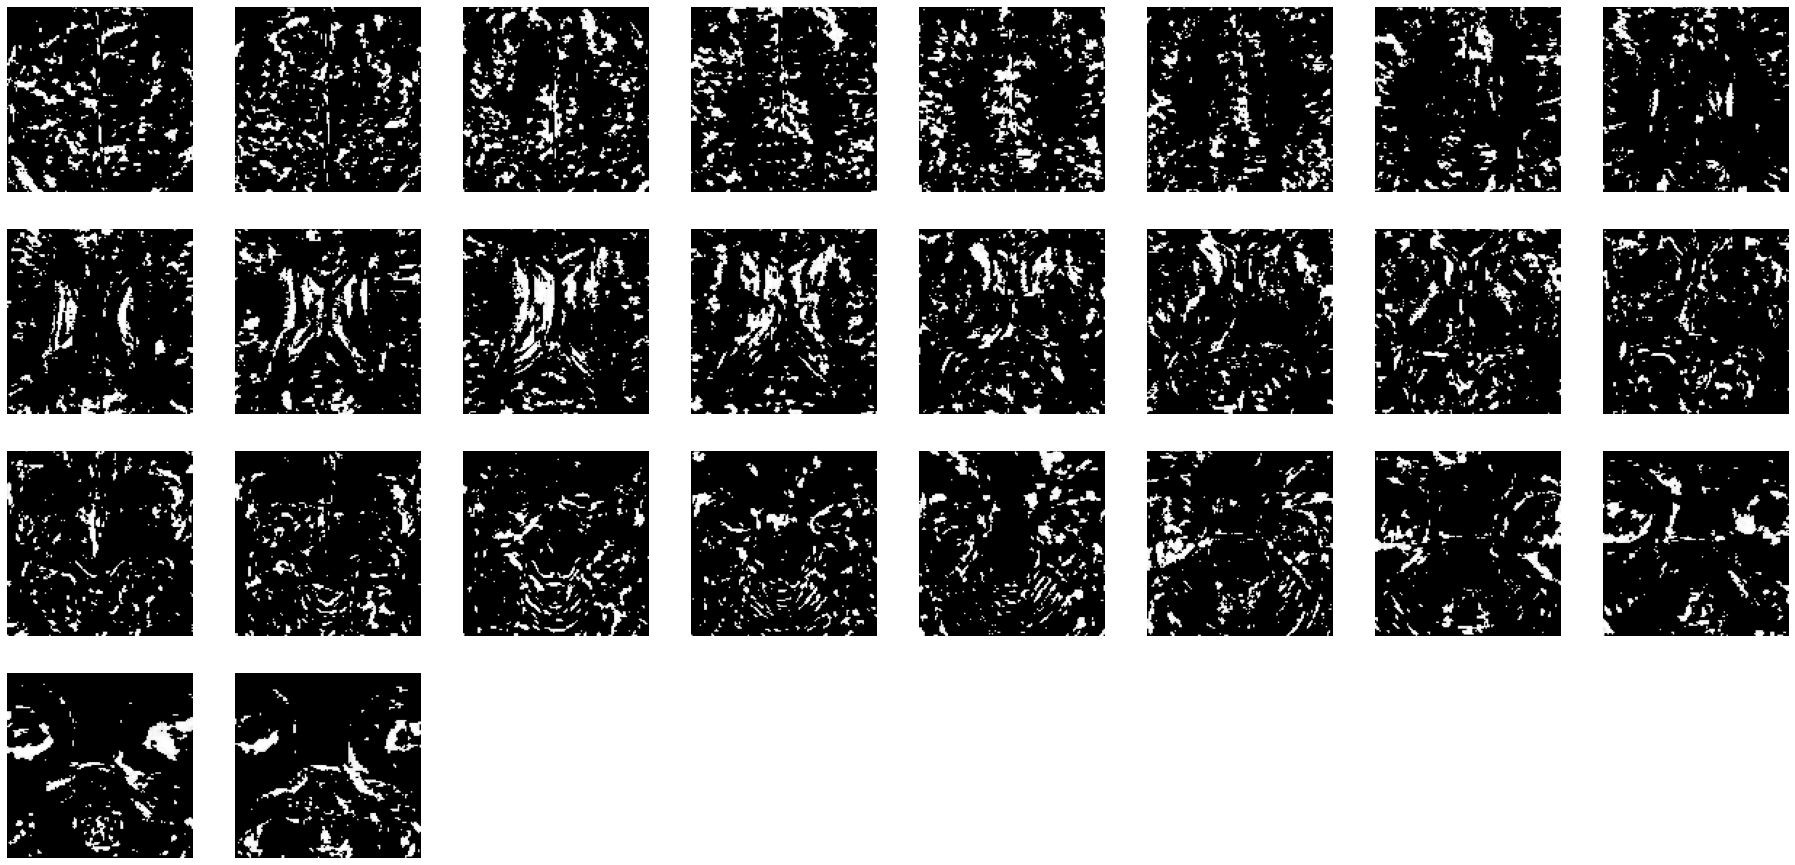

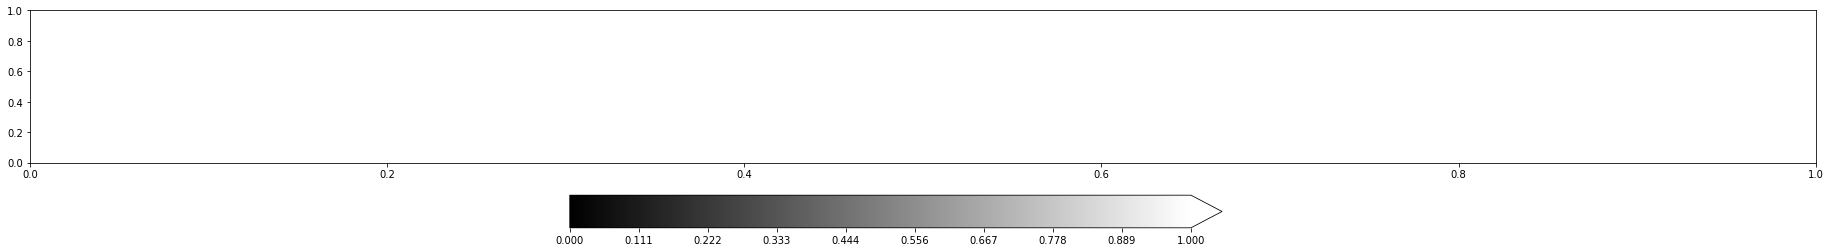

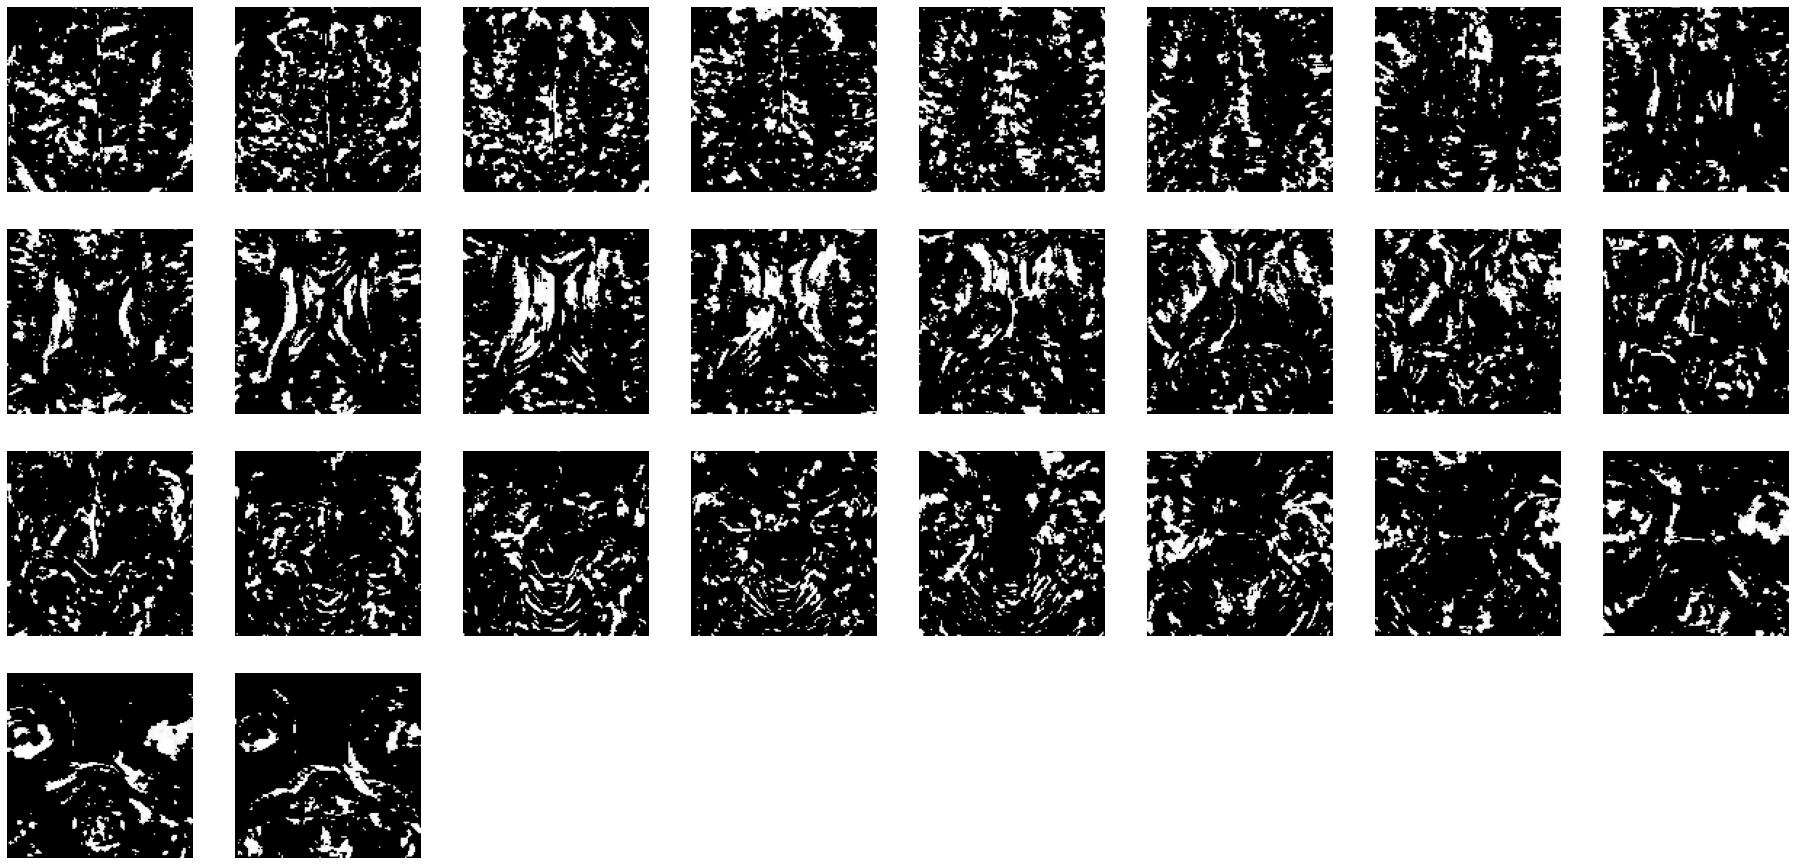

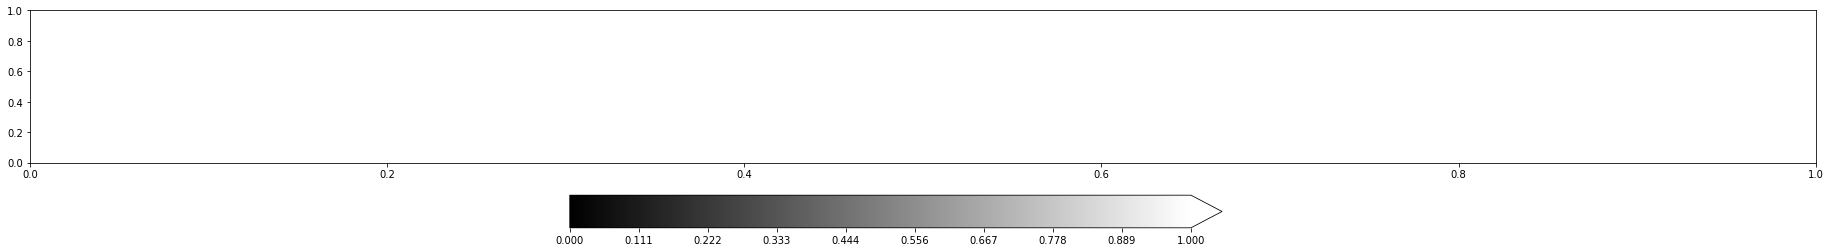

In [19]:
PATH=r"C:\Users\CH2\Documents\datasets\ZS_t1_full\TT_feq\\"
pth=0.1
for i in range(1,4):
    p=np.load(PATH+f"delta{i}_p.npy")
    p[np.isnan(p)]=1
    p[p>pth]=1
    pme=1-p

    vis_slice(pme,axis=2,start=0,skip=4,upside=True)
    p_nii=nib.Nifti1Image(pme,afi,hed)
    nib.save(p_nii,rf"{out_path}/p{i}_{pth}_feq.nii.gz")

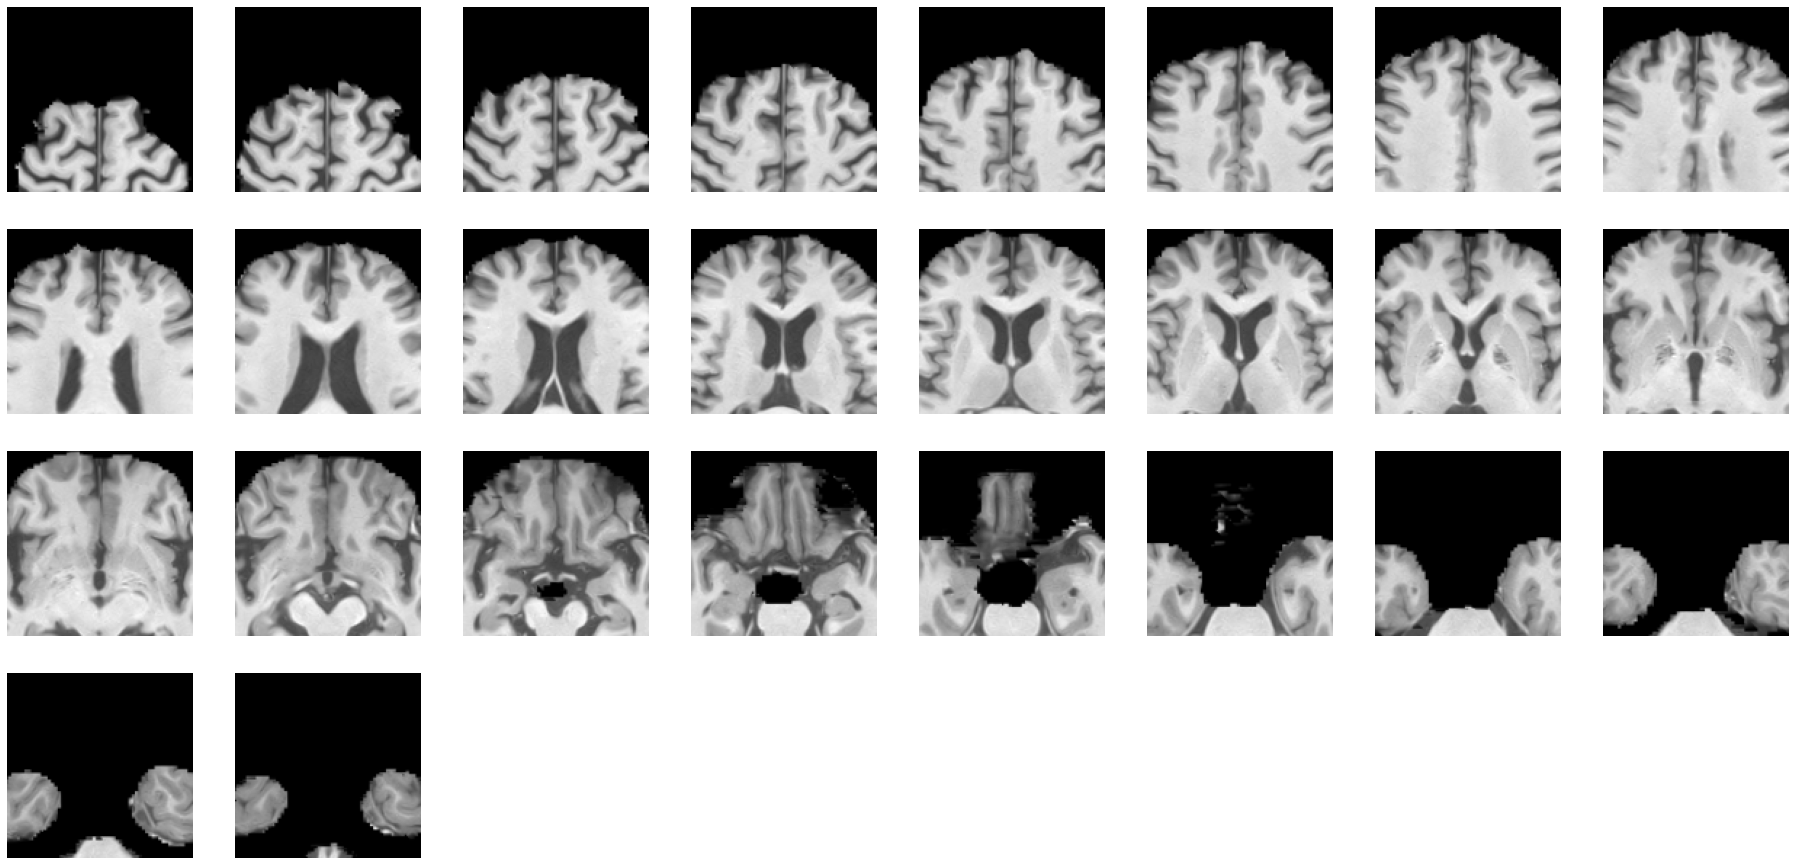

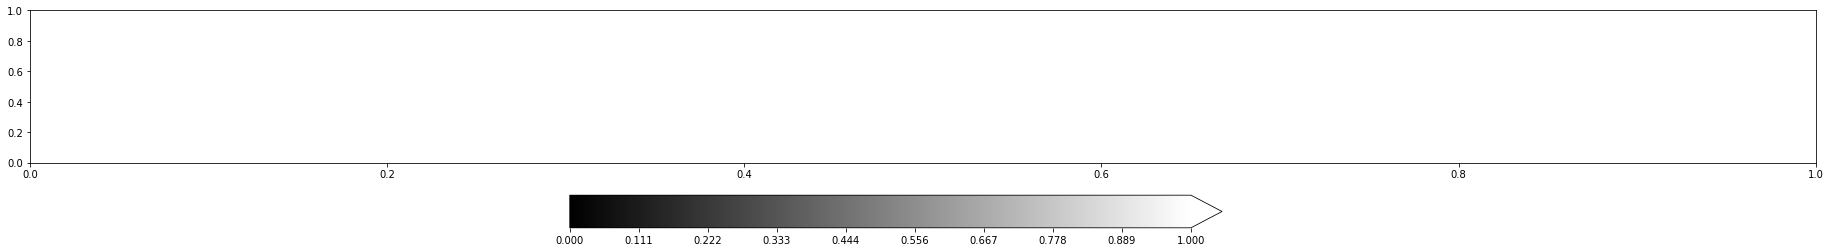

In [8]:
import numpy as np

PATH=r"C:\Users\CH2\Documents\datasets\ZS_t1_full\patches\ZS20276854"+"\\"
ds=np.load(PATH+"patch_16.npz")
vis_slice(ds["T1"],axis=2,start=0,skip=4,upside=True)

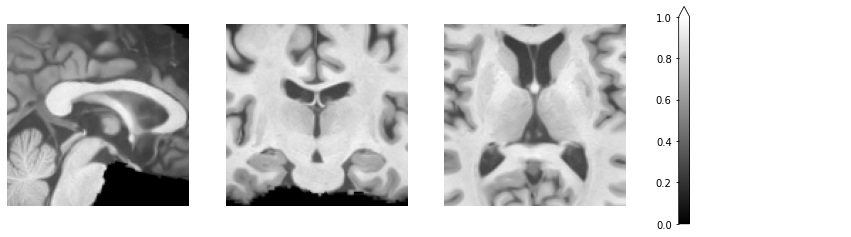

In [27]:
PATH=r"C:\Users\CH2\Documents\datasets\ZS_t1_full\patches\ZS17141240"+"\\"
ds=np.load(PATH+"patch_13.npz")
vis_img(ds["T1"])

In [28]:
1 if ds["label"]=="NC"else 0

1

In [25]:
ds["T1"].std()

0.2700108